# Linear regression


Linear regression is a **supervised learining** algorithm used when target / dependent variable  **continues** real number. It establishes relationship between dependent variable $y$ and one or more independent variable $x$ using best fit line. 



 The simplest linear model for regression is one that involves a linear combination of
the input variables $\mathbf x = (x_1,x_2,\dots,x_{M-1})^T$,
\begin{align*}
 y(\mathbf x, \mathbf w) &= w_0 + w_1x_1+\dots+w_{M-1}x_{M-1} \\&= w_0 + \sum_{m=1}^{M-1} w_m x_m = \mathbf w^T \mathbf x.
 \end{align*}
where  $\mathbf w = (w_1,w_2,\dots,w_{M-1})$.
 This is known as linear regression. The key property of this model is that it is a linear function of the parameters $\mathbf w$. 
The model is also a linear function of the input variables $\mathbf x$.


 In linear regression maximum likelihood estimation assumes that the target variable $t$ is given by a deterministic function $y(\mathbf x, \mathbf w)^T$ with additive Gaussian noise so that
\begin{align*}
t &= y(\mathbf x, \mathbf w) + \epsilon, \\
\end{align*}
where $\epsilon \sim \mathcal N(0,\beta^{-1})$, with precision $\beta$. (Notice that $\beta^{-1} = \sigma^2$ is the distribution´s variance.) Thus we can write
\begin{align*}
p(t\mid \mathbf x, \mathbf w, \beta) &\sim \mathcal  N(y(\mathbf x, \mathbf w),\beta^{-1}). \\
\end{align*}
 
 Consider the data set of i.i.d, samples 
\begin{align*}
\mathcal D &= \{\{t_1,x_1\},\{t_2,x_2\},\dots,\{t_N,x_N\}\}. \\
\end{align*}
 The likelihood of the data is given by
\begin{align*}
\log   p(\mathbf t\mid \mathbf x, \mathbf w, \beta) &= \sum_{n=1}^N \log N(t_n,\mid \mathbf w^T\mathbf x_n,\beta^{-1})\\
&= \frac{N}{2}\log \beta -  \frac{N}{2}\log (2\pi) - \beta E_D(\mathbf w)
\end{align*}
where
\begin{align*}
 E_D(\mathbf w) = \frac{1}{2} \sum_{n=1}^N (t_n- \mathbf w^T \mathbf x)^2
\end{align*}
 
Maximum likelihood parameter estimation is equivalent to least square minimization because 
$\nabla \log   p(\mathbf t\mid \mathbf x, \mathbf w, \beta) = \mathbf 0$ implies minimizing $E_D(\mathbf w)$.

Show that 

$$\beta_{ML}^{-1} = \frac{1}{N}  \sum_{n=1}^N (t_n- \mathbf w^T \mathbf x)^2,$$
$$w_0 =  \frac{1}{N} \sum_{n=1}^N t_n -  \sum_{n=1}^N w_m \xi_m,$$
$$\mathbf w_{ML} = \underbrace{\mathbf{(X^TX)}^{-1}\mathbf X^T}_{\mathsf{ pseudo \,\,inverse}} \mathbf t,$$
where
$\xi_m = \sum_{n=1}^N x_{nm}$, $t=(t_1,t_2,\dots,t_n)^T$, and $\mathbf X$ is the matrix $[\mathbf x_1 \mathbf x_2 \dots \mathbf x_n]$



We will build a Linear regression model for Medical cost dataset. The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent and charge as a dependent feature. We will predict individual medical costs billed by health insurance.

## Import libraries and dataset


In [2]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [9,5]
plt.rcParams['font.size'] =15
plt.rcParams['font.weight']= 'bold'
#plt.style.use('seaborn-whitegrid')

In [3]:
# Import dataset
#path ='dataset/'
df = pd.read_csv('insurance.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

#Lets look into top few rows and columns in the dataset
df.head()


Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


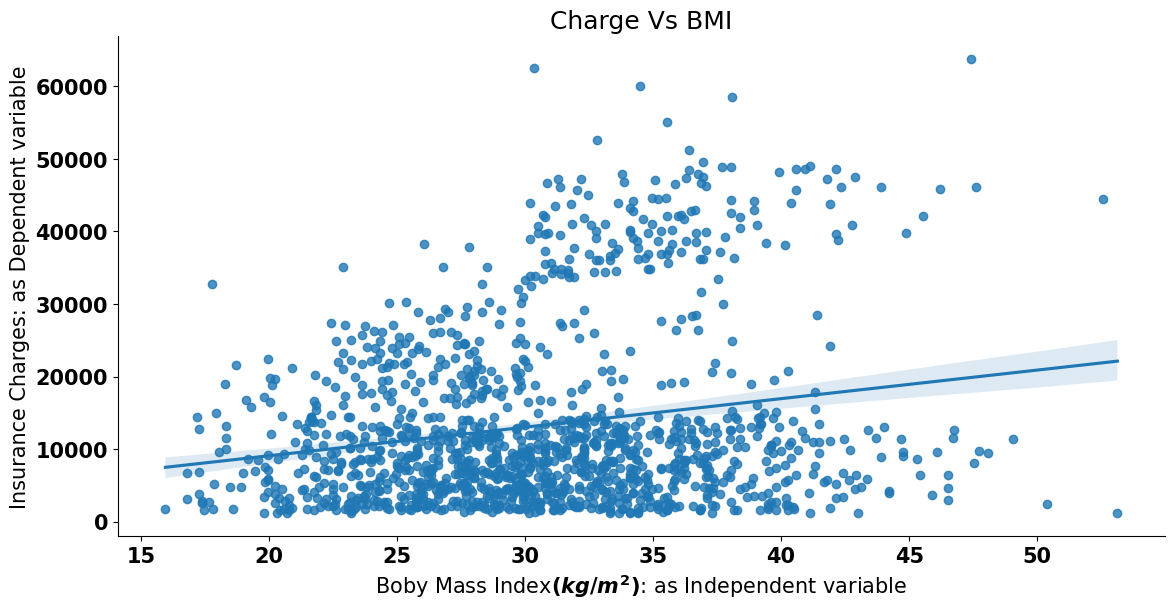

In [4]:
""" for our visualization purpose will fit line using seaborn library only for bmi as independent variable 
and charges as dependent variable"""

sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

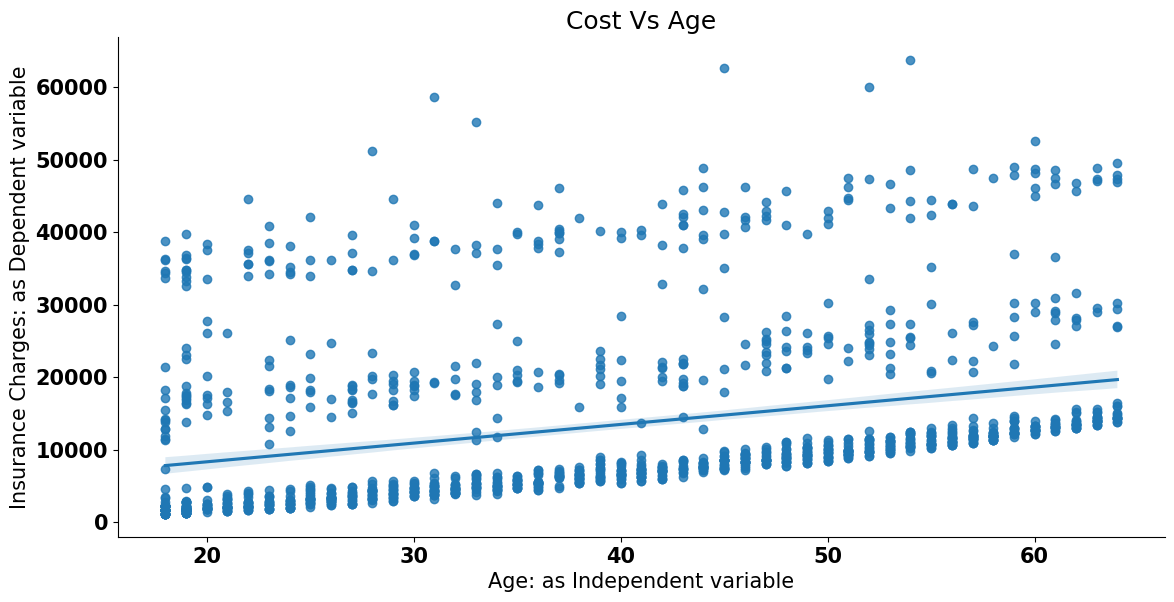

In [5]:
""" for our visualization purpose will fit line using seaborn library only for age as independent variable 
and charges as dependent variable"""

sns.lmplot(x='age',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Age: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Cost Vs Age');


## Exploratory data analysis

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


###  Check for missing value

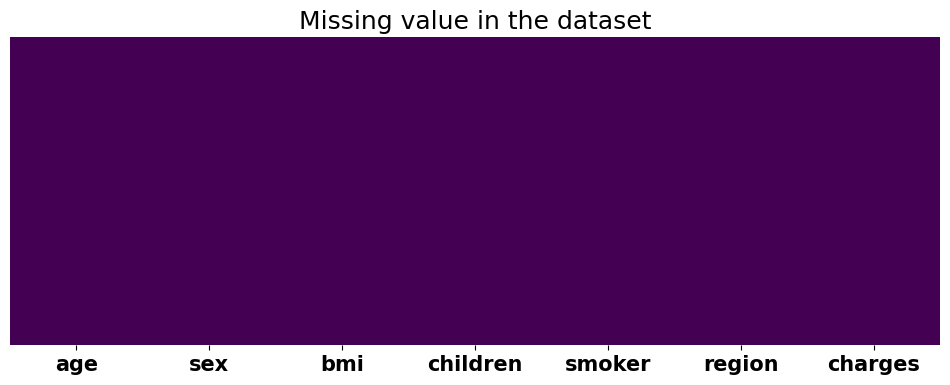

In [7]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

There is no missing value in the data sex

### Plots

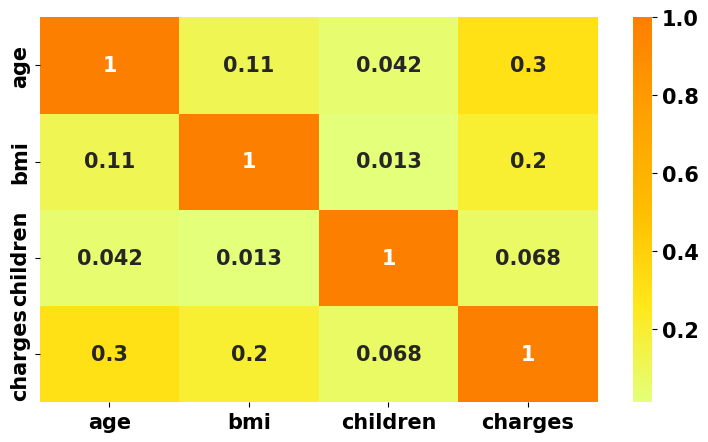

In [8]:
# correlation plot
corr = df.select_dtypes('number').corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

Pair-wise corretations are very small

C:\Users\jacj2\AppData\Local\Temp\ipykernel_27208\2325412875.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'],bins=50,color='r',ax=ax)
C:\Users\jacj2\AppData\Local\Temp\ipykernel_27208\2325412875.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['charges']),bins=40

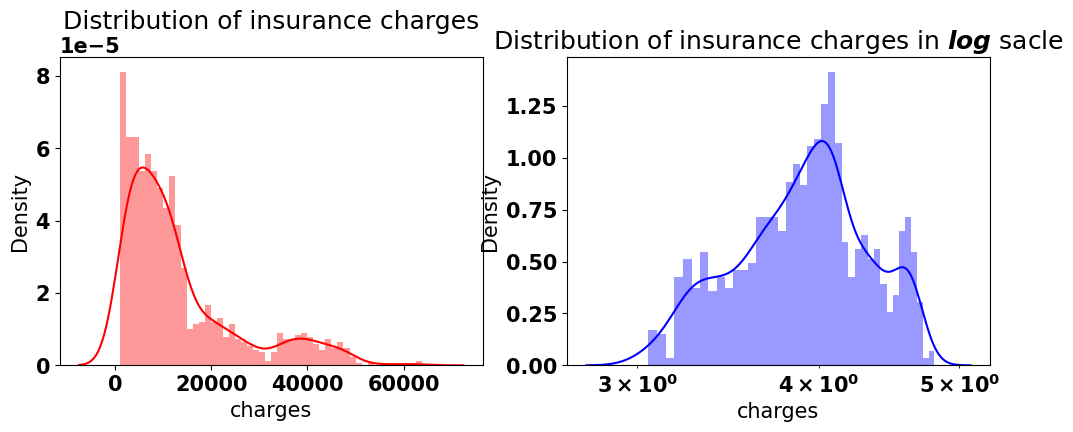

In [9]:
f= plt.figure(figsize=(12,4))
# Analizamos los valores de estos rbros sin trasnformar 
ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')
# la misma variable escalada al logaritmo de esos mismos valores 
ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)# Aqui se transforma en un logaritmo
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');


# Se reparametrizacion de los valores

The left plot is skewed. In right plot the log of the charges.

C:\Users\jacj2\AppData\Local\Temp\ipykernel_27208\2706195491.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
C:\Users\jacj2\AppData\Local\Temp\ipykernel_27208\2706195491.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)


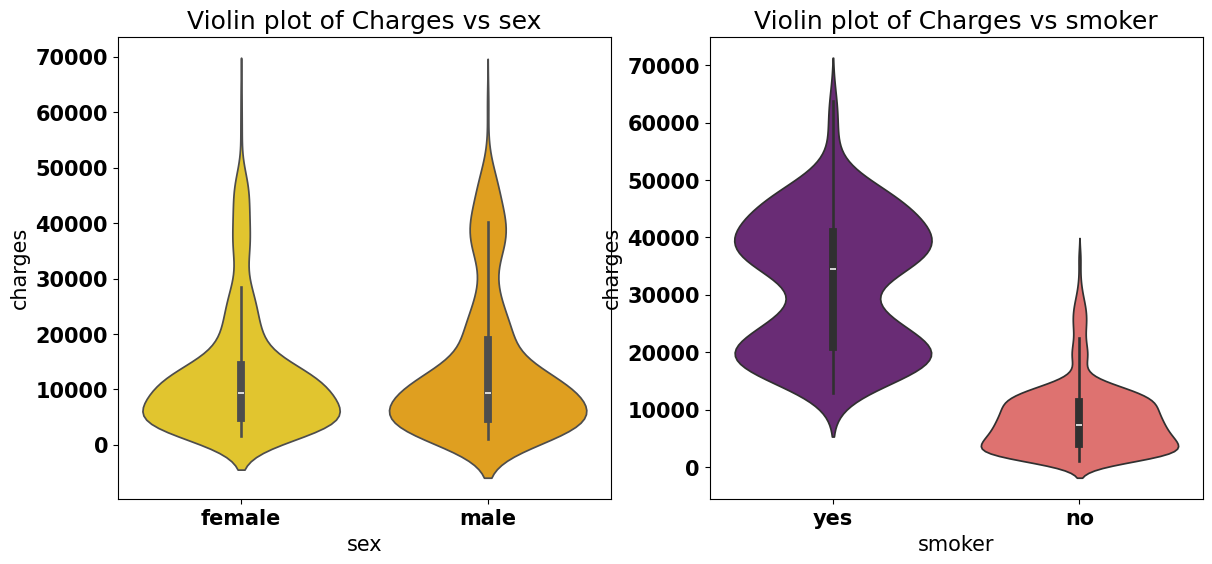

In [10]:
# Densidad de probabilidad no parametrica 
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

From left plot the insurance charge for male and female is approximatley in same range,it is average around 5000 bucks. In right plot the insurance charge for smokers is much wide range compare to non smokers, the average charges for non smoker is approximately 5000 bucks. For smoker the minimum insurance charge is itself 5000 bucks.

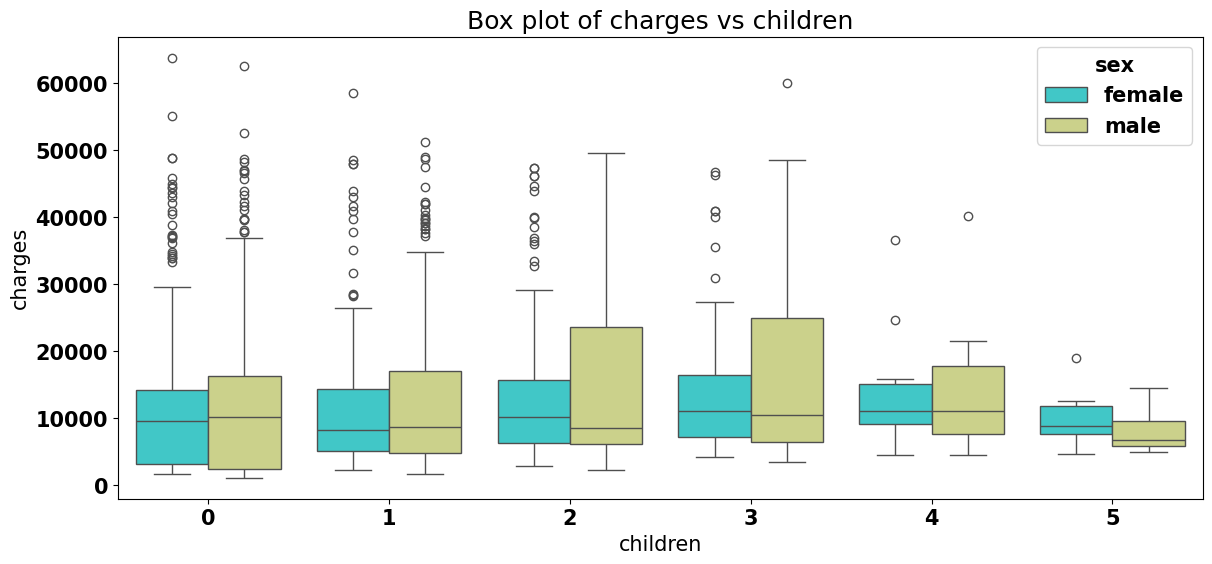

In [11]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children');

In [12]:
#revisar
#df.groupby('children').agg(['mean','min','max'])['charges']

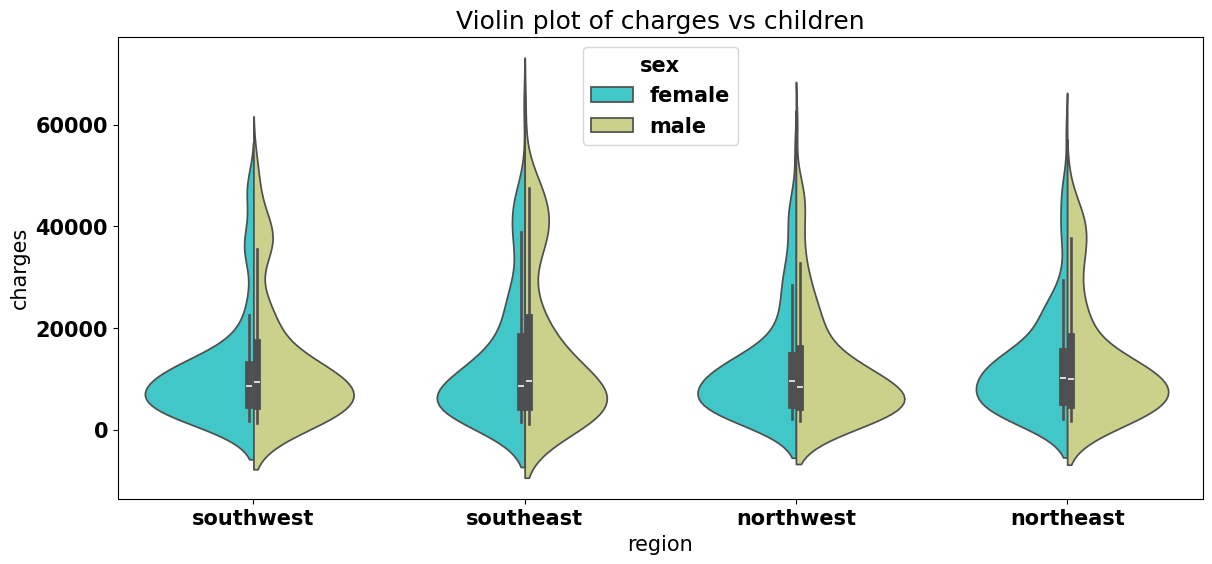

In [13]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of charges vs children')
plt.show()

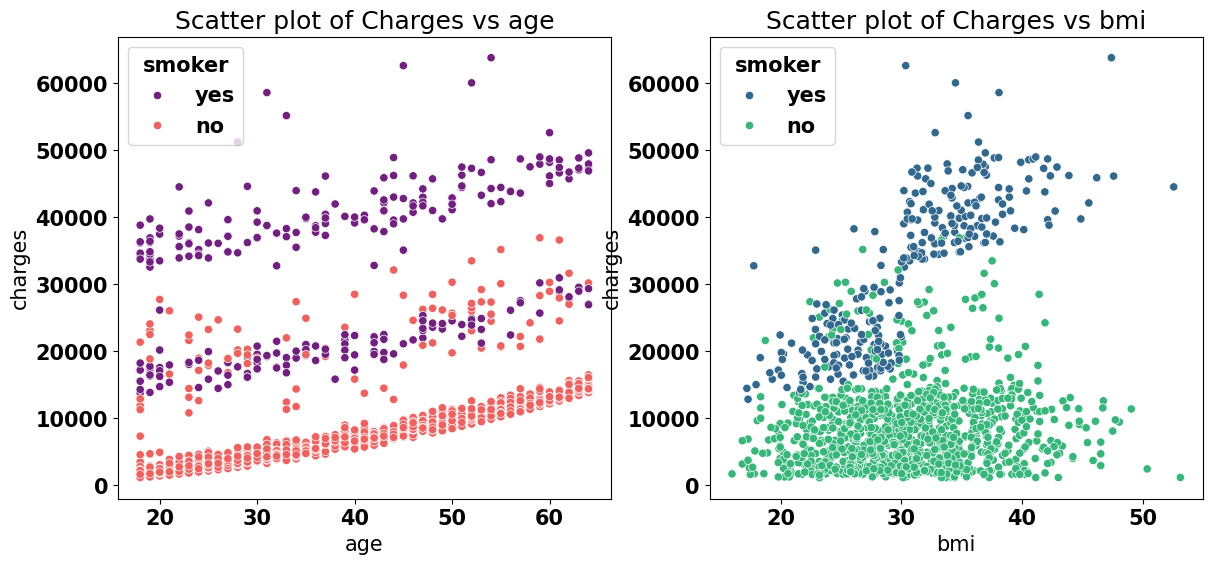

In [14]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

>From left plot the minimum age person is insured is 18 year. There is slabs in policy most of non smoker take $1^{st}$ and $2^{nd}$ slab, for smoker policy start at $2^{nd}$ and $3^{rd}$ slab.

>Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. The minimum bmi is 16$kg/m^2$ and maximum upto 54$kg/m^2$

## Data Preprocessing
### Encoding
Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.
 1. Label Encoding
 2. One hot encoding
 3. Dummy variable trap

**Label encoding** refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

A **One hot encoding** is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

The **Dummy variable trap** is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.

By using *pandas get_dummies* function we can do all above three step in line of code. We will this fuction  to get dummy variable for sex, children,smoker,region features. By setting *drop_first =True* function will remove dummy variable trap by droping one variable and original variable.

In [15]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [16]:
df_encode

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,0,0,0,0,0,1


In [17]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


### Box -Cox transformation
A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests. All that we need to perform this transformation is to find lambda value and apply the rule shown below to your variable.  
$$\mathbf{ \begin {cases}\frac {y^\lambda - 1}{\lambda},& y_i\neg=0 \\
 log(y_i) & \lambda = 0 \end{cases}}$$
 The trick of Box-Cox transformation is to find lambda value. The following function returns the transformed variable, lambda value,confidence interval

In [18]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['charges'],alpha=0.05)

#df['charges'] = y_bc  
# it did not perform better for this model, so log transform is used
ci,lam

((-0.011402906172966682, 0.09880968597671798), 0.043649061187374535)

In [19]:
## Log transform
df_encode['charges'] = np.log(df_encode['charges'])

The original categorical variable are remove and also one of the one hot encode varible column for perticular categorical variable is droped from the column. So we completed all three encoding step by using get dummies function.

## Train Test split

In [20]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

## Model building
In this step build model using our linear regression equation $\mathbf{\theta = (X^T X)^{-1} X^Ty}$. In first step we need to add a feature $\mathbf{x_0 =1}$ to our original data set. 

In [21]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [22]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [23]:
parameter_df

,Parameter,Columns,theta
0,theta_0,intersect:x_0=1,7.059171
1,theta_1,age,0.033134
2,theta_2,bmi,0.013517
3,theta_3,OHE_male,-0.067767
4,theta_4,OHE_1,0.149457
5,theta_5,OHE_2,0.272919
6,theta_6,OHE_3,0.244095
7,theta_7,OHE_4,0.523339
8,theta_8,OHE_5,0.466030
9,theta_9,OHE_yes,1.550481


In [24]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,7.059171,7.059171
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013517,0.013517
3,theta_3,OHE_male,-0.067767,-0.067767
4,theta_4,OHE_1,0.149457,0.149457
5,theta_5,OHE_2,0.272919,0.272919
6,theta_6,OHE_3,0.244095,0.244095
7,theta_7,OHE_4,0.523339,0.523339
8,theta_8,OHE_5,0.466030,0.466030
9,theta_9,OHE_yes,1.550481,1.550481


The parameter obtained from both the model are same.So we succefull build our model using normal equation and verified using sklearn linear regression module. Let's move ahead, next step is prediction and model evaluvation.

## Model evaluation


$\mathbf{R^2}$ is statistical measure of how close data are to the fitted regression line. $\mathbf{R^2}$ is always between 0 to 100%. 0% indicated that model explains none of the variability of the response data around it's mean. 100% indicated that model explains all the variablity of the response data around the mean.

$$\mathbf{R^2 = 1 - \frac{SSE}{SST}}$$
**SSE = Sum of Square Error**  
**SST = Sum of Square Total**  
$$\mathbf{SSE = \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$
$$\mathbf{SST = \sum_{i=1}^{m}(y_i - \bar{y}_i)^2}$$
Here $\mathbf{\hat{y}}$ is predicted value and $\mathbf{\bar{y}}$ is mean value of $\mathbf{y}$.

### La regresión en Machine Learning trata de predecir valores numéricos, como el precio de una casa o la temperatura de mañana. Para saber qué tan buena es una predicción, usamos diferentes métricas:
- Error Absoluto Medio (MAE): Imagina que intentas adivinar la edad de tus amigos y te equivocas por algunos años. MAE es como calcular cuántos años te equivocaste en promedio. Mientras más bajo, mejor.
- Error Cuadrático Medio (MSE): Similar al MAE, pero aquí elevamos al cuadrado cada error antes de promediar. Esto castiga más los errores grandes. Es útil cuando quieres evitar equivocaciones muy graves.
- Raíz del Error Cuadrático Medio (RMSE): Es la raíz cuadrada del MSE, lo que lo devuelve a unidades más comprensibles. Si predices la altura de personas, el RMSE estará en centímetros o metros.
- Coeficiente de Determinación (R²): Piensa en esto como un puntaje de qué tan bien tu modelo entiende los datos. Va de 0 a 1, donde 1 significa una predicción perfecta. Es como decir qué tan bien conoces a alguien basado en cómo puedes predecir sus gustos.


In [25]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
beta1 = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('Residual variance beta^{-1} $: ',beta1)
print('R square obtain for normal equation method is :',R_square)

Residual variance beta^{-1} $:  0.1872962232298204
R square obtain for normal equation method is : 0.7795687545055301


In [26]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) is: ',MSE)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) is:  0.18729622322981895
R square obtain for scikit learn library is : 0.7795687545055319


The model returns $R^2$ value of 77.95%, so it fit our data test very well, but still we can imporve the the performance of by diffirent technique. Please make a note that we have transformer out variable by applying  natural log. When we put model into production antilog is applied to the equation.

## Model Validation
In order to validated model we need to check few assumption of linear regression model. The common assumption for *Linear Regression* model are following
1. Linear Relationship: In linear regression the relationship between the dependent and independent variable to be *linear*. This can be checked by scatter ploting Actual value Vs Predicted value
2. The residual error plot should be *normally* distributed.
3. The *mean* of *residual error* should be 0 or close to 0 as much as possible. Recall that $\epsilon \sim \mathcal N(0,\beta^{-1})$ with $\beta^{-1} = \sigma^{2}$
4. The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
5. Linear regession assumes that there is little or no *Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor *VIF* identifies correlation between independent variables and strength of that correlation. $\mathbf{VIF = \frac {1}{1-R^2}}$, If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical level of multicollinearity.
6. Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.

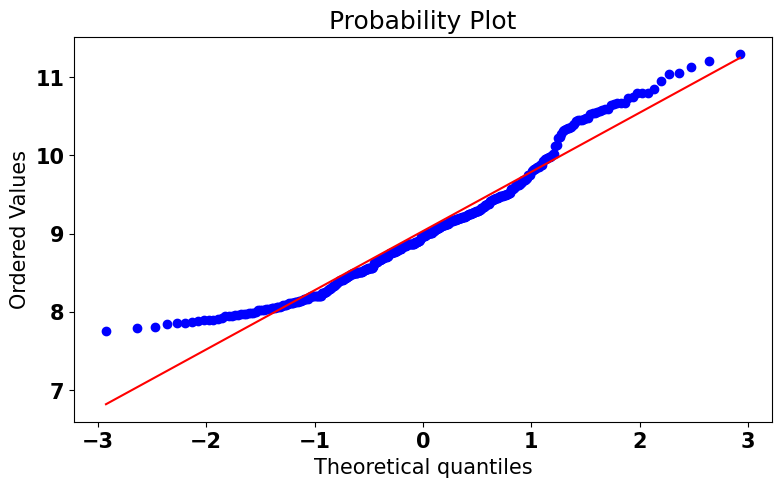

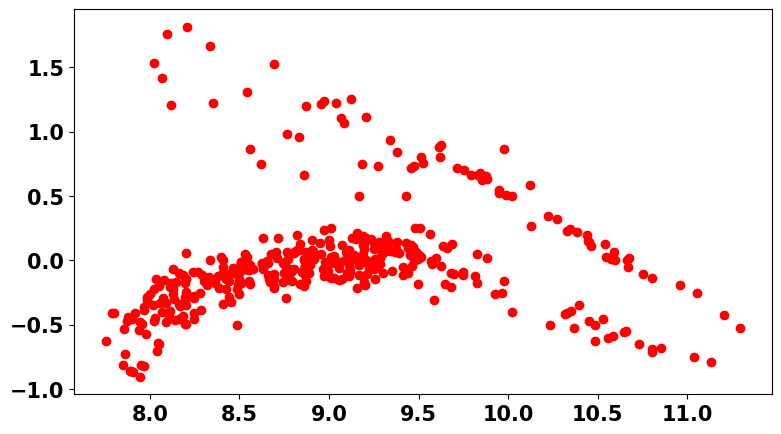

In [ ]:
# Check for Multivariate Normality
# Quantile-Quantile plot 

#Una gráfica QQ-Plot (Quantile-Quantile Plot) es excelente para enseña
# cómo evaluar si una distribución de datos sigue una distribución normal. 
# Básicamente, compara los cuantiles de los datos observados con los cuantiles de una distribución teórica normal

import scipy.stats as stats
import pylab 
stats.probplot(y_pred_sk, dist="norm", plot=pylab)
pylab.show()


# Homoscedasticity check
plt.scatter(y = (y_test - y_pred_sk), x= y_pred_sk, color='r') 


In [29]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

4.536561945911138

Results summary:
1. In our model  the actual vs predicted is not linear.
2. The residual mean is close to zero. The density function is right skewed.
3. Q-Q plot shows as value log value greater than 1.5 trends to increase
4. The plot shows that data are not homoscedastic.
5. Variance inflation factor value is less than 5, so no multicollearity.